In [2]:
import os
print(os.getcwd())

/Users/tylerbrecker


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import psutil
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



In [4]:
df = pd.read_csv("/Users/tylerbrecker/Downloads/restaurant_data.csv", low_memory=False)

In [5]:
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

Thankfully there is no data types that require alteration in order to effectively analyze

In [7]:
(round(df.isnull().sum() / df.shape[0] * 100, 2)).sort_values(ascending=False)

Name                      0.0
Number of Reviews         0.0
Weekday Reservations      0.0
Weekend Reservations      0.0
Parking Availability      0.0
Service Quality Score     0.0
Ambience Score            0.0
Avg Review Length         0.0
Chef Experience Years     0.0
Location                  0.0
Social Media Followers    0.0
Marketing Budget          0.0
Average Meal Price        0.0
Seating Capacity          0.0
Rating                    0.0
Cuisine                   0.0
Revenue                   0.0
dtype: float64

Again there is no missing data, so no points are required to be taken out

In [8]:
le = LabelEncoder()

In [9]:
df['Location'] = le.fit_transform(df['Location'])
df['Cuisine'] = le.fit_transform(df['Cuisine'])
df['Name'] = le.fit_transform(df['Name'])
df['Parking Availability'] = le.fit_transform(df['Parking Availability'])

Here a label encoder is used in order to convert values that typically could not be used within heatmaps, such as type of cuisine, location, name, etc.. In to numerical form, assigning each value within the category a numerical value. 

In [42]:
df[['Average Meal Price', 'Revenue','Marketing Budget','Weekday Reservations','Weekend Reservations','Seating Capacity', 'Service Quality Score','Social Media Followers']].describe()

,Average Meal Price,Revenue,Marketing Budget,Weekday Reservations,Weekend Reservations,Seating Capacity,Service Quality Score,Social Media Followers
count,8368.000000,8.368000e+03,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000
mean,47.896659,6.560706e+05,3218.254900,29.235301,29.491754,60.212835,5.508772,36190.621773
std,14.336767,2.674137e+05,1824.896053,20.004277,20.025415,17.399488,2.586552,18630.153330
min,25.000000,1.847085e+05,604.000000,0.000000,0.000000,30.000000,1.000000,5277.000000
25%,35.490000,4.546514e+05,1889.000000,13.000000,13.000000,45.000000,3.200000,22592.500000
50%,45.535000,6.042421e+05,2846.500000,26.000000,27.000000,60.000000,5.600000,32518.500000
75%,60.300000,8.130942e+05,4008.500000,43.000000,43.000000,75.000000,7.800000,44566.250000
max,76.000000,1.531868e+06,9978.000000,88.000000,88.000000,90.000000,10.000000,103777.000000


Of the main categories being tested this chart was created in order to insure that no values were well beyond the mean and needed to be excluded from the calculations. 

In [23]:
columns = ['Average Meal Price', 'Revenue','Marketing Budget','Weekday Reservations','Weekend Reservations','Seating Capacity', 'Service Quality Score','Social Media Followers']

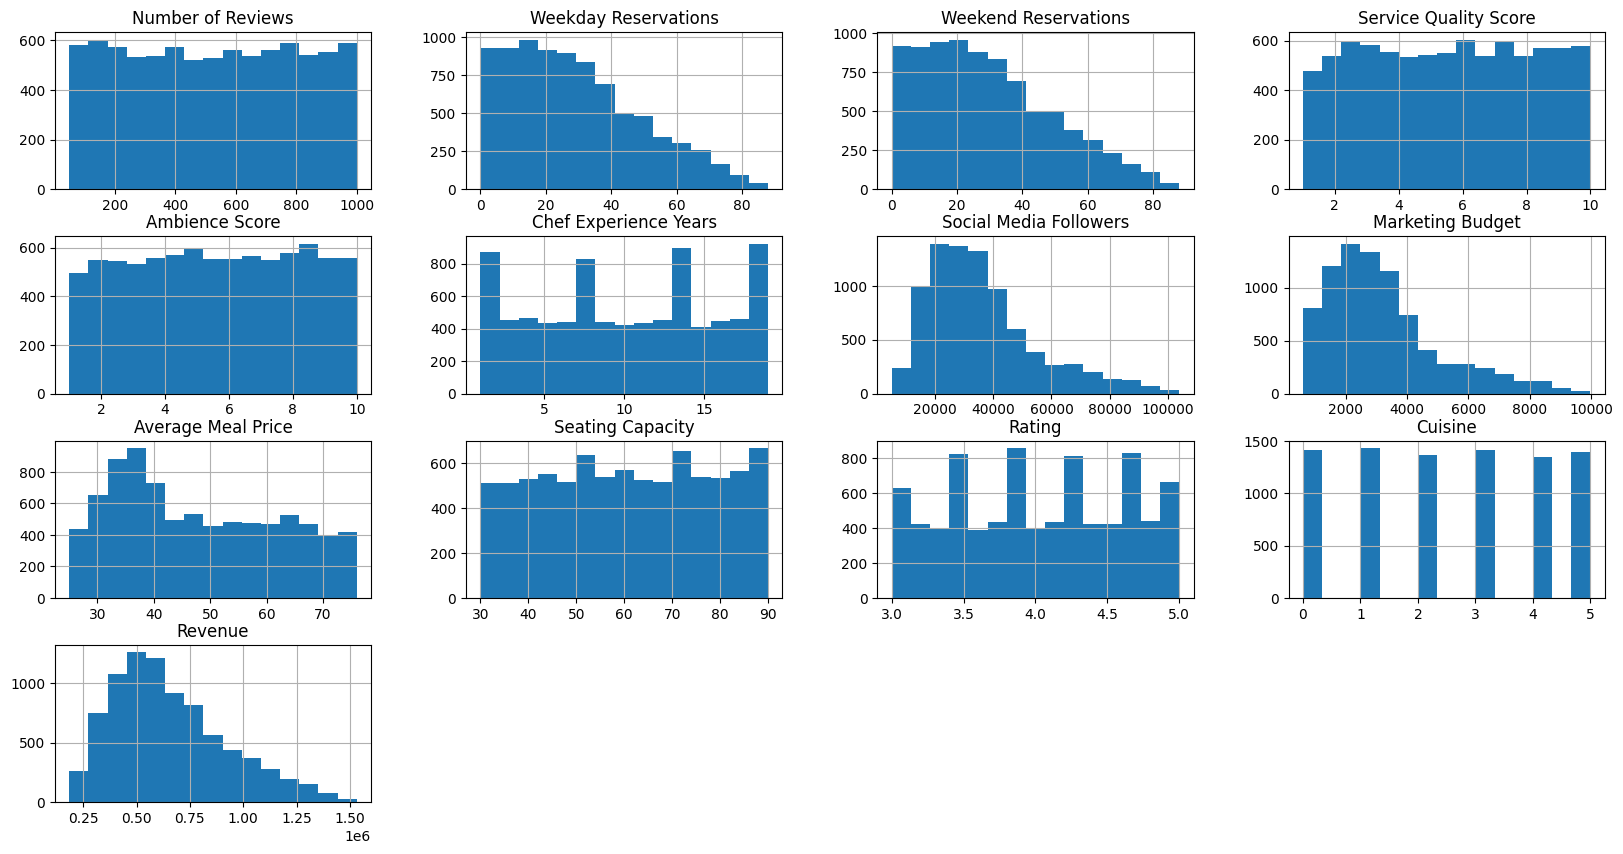

In [24]:
df[columns].hist(bins=15, figsize=(20,10));

In [10]:
corr = df[[ 'Average Meal Price', 'Revenue','Marketing Budget','Weekday Reservations','Weekend Reservations','Seating Capacity','Social Media Followers']].corr()

Initially, cuisine and service quality score were included within the correlation matrix, however as they had little to no correlation with any other variables they were removed

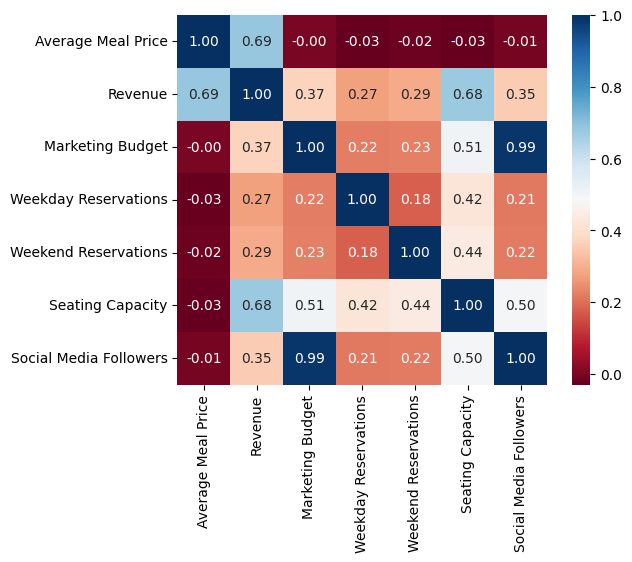

In [11]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

While Average Meal Price and Seating Capacity have the highest correlation to revenue, those are rather self explanatory, what's more interesting is the marketing budget's correlation to revenue. While this would seem rather obvious, as seen in the plots below, marketing budget has a rather interesting impact on revenue.

In [12]:
corr_matrix = df.corr()
print(corr_matrix['Revenue'].sort_values(ascending=False))

Revenue                   1.000000
Average Meal Price        0.686365
Seating Capacity          0.677317
Marketing Budget          0.365322
Social Media Followers    0.354466
Weekend Reservations      0.292400
Weekday Reservations      0.273284
Chef Experience Years     0.026899
Rating                    0.009899
Service Quality Score     0.005375
Ambience Score            0.003388
Parking Availability     -0.003548
Number of Reviews        -0.008233
Name                     -0.009411
Avg Review Length        -0.011278
Cuisine                  -0.032193
Location                 -0.337975
Name: Revenue, dtype: float64


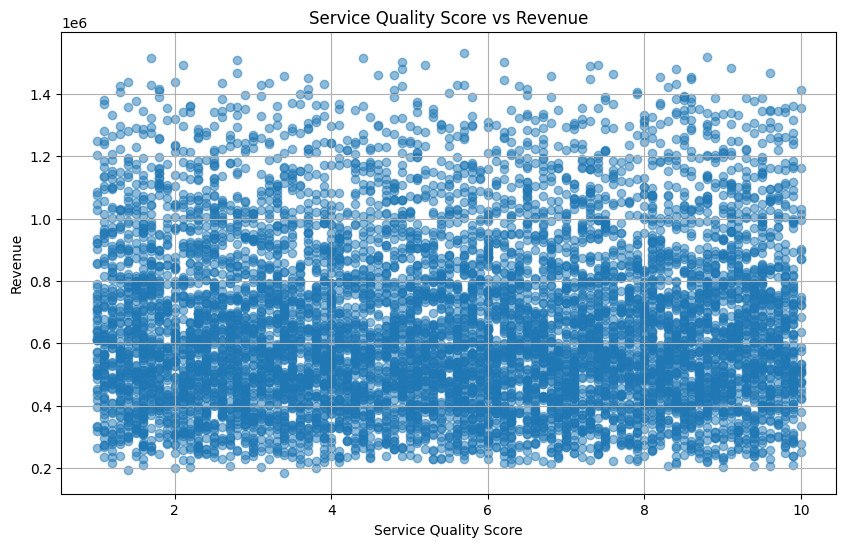

In [13]:
x = df['Service Quality Score']
y = df['Revenue']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Service Quality Score vs Revenue')
plt.xlabel('Service Quality Score')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

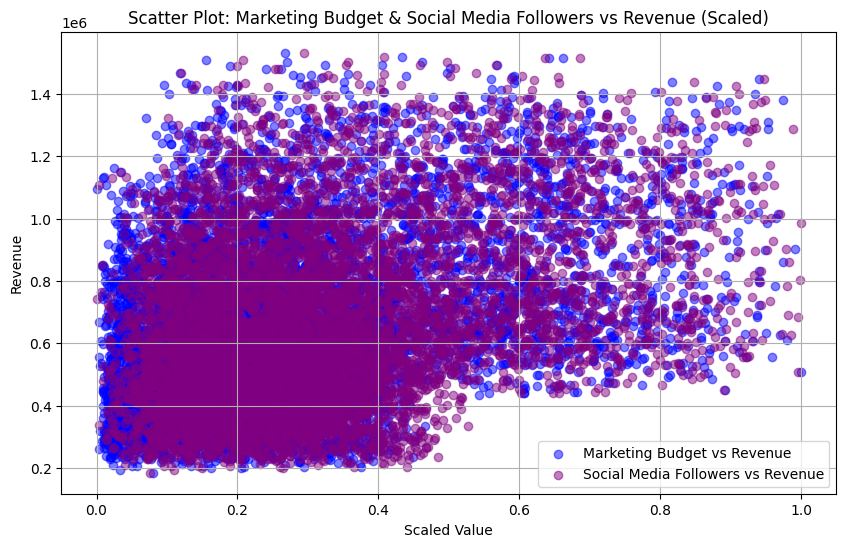

In [55]:
scaler = MinMaxScaler()

df[['Marketing Budget', 'Social Media Followers']] = scaler.fit_transform(df[['Marketing Budget', 'Social Media Followers']])

plt.figure(figsize=(10, 6))

plt.scatter(df['Marketing Budget'], df['Revenue'], alpha=0.5, label='Marketing Budget vs Revenue', color='blue')

plt.scatter(df['Social Media Followers'], df['Revenue'], alpha=0.5, label='Social Media Followers vs Revenue', color='purple')

plt.title('Scatter Plot: Marketing Budget & Social Media Followers vs Revenue (Scaled)')
plt.xlabel('Scaled Value')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


There is a clear point that suggests that marketing up to that value is extremely profitable, but beyond it does not have a large impact. However this could be influenced by a number of factors, such as the fact that restaraunts with more revenue would have a larger budget for marketing. 